In [1]:
# %load quick_imports.txt
import random
import sys

import numpy as np
import matplotlib.pyplot as plt

# Bokeh imports
from bokeh.io import output_notebook, show, save
from bokeh.plotting import figure, output_file, ColumnDataSource, reset_output
from bokeh.models import HoverTool
output_notebook()

from ipywidgets.widgets import Text

#scipy constants
from scipy.constants import Boltzmann as kB
from scipy.constants import Avogadro as NA
from scipy.constants import Planck as h
from scipy.constants import speed_of_light as c0
from scipy.constants import R

sys.path.append('../CNT-SIM/')
from CNTSimFile import CNTSimFile
from mc_sim import exciton_sim_4_level, exciton_sim_4_lvl_full_exchange


Loading BokehJS ...

In [2]:
k_er_per_s = 1.5e10  # constant for radiativ decay from S11
k_br_per_s = 1.5e10  # constant for radiativ decay from S11*
k_enr_per_s = 1e10  # constant of non-radiativ decay from S11
k_bnr_per_s = 1e10  # constant for non-radiativ decay from S11*

k_de_per_s = 1e09  # constant for going from dark to S11 state
k_ed_per_s = 5e11  # constant for going from S11 to dark statestate

# termal detrapping 10.1021/acs.jpclett.8b03732
k_bd_per_s = 0.5 * (1e12 / 385 + 1e12 / 1132) + 0.1e12 * np.exp(-1.6182e-11 /
                                                                (kB * 300))

k_dnr_per_s = 0

kin_const_1 = np.array([k_br_per_s, k_er_per_s, k_bnr_per_s, k_enr_per_s, k_bd_per_s,
                        k_ed_per_s, k_de_per_s, k_dnr_per_s])

In [3]:
exc_sim_len_1 = CNTSimFile('../sim_output/2020-05-11_exciton_sim_4_level-len_1.h5', kin_const_1)

Existing file loaded successfully.


../CNT-SIM/CNTSimFile.py:30: UserWarning: File already exists, kinetic constants ingored.
  warn("File already exists, kinetic constants ingored.")


In [9]:
exc_sim_len_1.notebook_output = True

In [10]:
n_defects = [0, 20]
CNT_length = [30, 60, 90, 120, 150, 200, 300, 500, 800, 1200]

In [11]:
exc_sim_len_1.length_dependance(10000, exciton_sim_4_level, CNT_length, 1e10,
                                {'t_step': 1, 'r_exc_nm': 2})

start of calculation: 2020-05-11 09:22:45.882474
start of exiton simulation: 2020-05-11 09:22:45.883886


Text(value='')

2020-05-11 09:22:45.947370
elapsed time: 00:00:00
exciton processed((0/ 10))
start of exiton simulation: 2020-05-11 09:22:45.947804


Text(value='')

2020-05-11 09:23:02.544748
elapsed time: 00:00:16
exciton processed((1/ 10))
start of exiton simulation: 2020-05-11 09:23:02.546691


Text(value='')

2020-05-11 09:23:18.735297
elapsed time: 00:00:16
exciton processed((2/ 10))
start of exiton simulation: 2020-05-11 09:23:18.735823


Text(value='')

2020-05-11 09:24:45.125104
elapsed time: 00:00:18
exciton processed((7/ 10))
start of exiton simulation: 2020-05-11 09:24:45.125597


Text(value='')

2020-05-11 09:25:03.867908
elapsed time: 00:00:18
exciton processed((8/ 10))
start of exiton simulation: 2020-05-11 09:25:03.870339


Text(value='')

In [12]:
exc_sim_len_1.save()

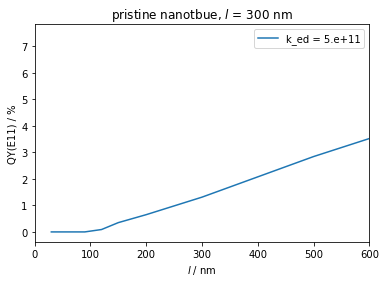

In [4]:
plt.plot(exc_sim_len_1.calc_dict['CNT_length'], exc_sim_len_1.QY[:, 1]*100,
              label=f'k_ed = {np.format_float_scientific(exc_sim_len_1.kin_const[5])}',)
plt.legend()
plt.xlim(0, 600)
plt.xlabel('$l$ / nm')
plt.ylabel('QY(E11) / %')
plt.title('pristine nanotbue, $l$ = 300 nm')
plt.savefig('../../tmp/2020-05-11_exciton_sim_4_level-QY-E11-pristine.png', dpi=500)

In [5]:
exc_sim_len_1.QY.shape

(10, 2)

In [6]:
exc_sim_len_1 = CNTSimFile('../sim_output/2020-04-24_exciton_sim_4_level-def_3.h5', kin_const_1)

Existing file loaded successfully.


In [7]:
exc_sim_len_1.QY.shape

(13, 2)